<a href="https://colab.research.google.com/github/Moonipur/GeTH-CRU/blob/main/Mosdepth_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
file_path = '/content/HCC108_depth.mosdepth.summary.txt'
chr = [
    "chr1", "chr2", "chr3", "chr4", "chr5", "chr6",
    "chr7", "chr8", "chr9", "chr10", "chr11", "chr12",
    "chr13", "chr14", "chr15", "chr16", "chr17", "chr18",
    "chr19", "chr20", "chr21", "chr22", "chrX", "chrY"
]

df = pd.read_table(file_path, sep='\t')

In [ ]:
file_path_sp = list(os.path.split(file_path))

In [ ]:
name = [*map(file_path_sp[-1].split('.').__getitem__,[0,3])]

In [ ]:
name.insert(1, "FINE_SUMMARY")

In [ ]:
file_path_sp[-1] = '.'.join(name)

In [ ]:
file_path_sp

['/content', 'HCC108_depth.FINE_SUMMARY.txt']

In [ ]:
out_file = os.path.join(*file_path_sp)

In [ ]:
df

,chrom,length,bases,mean,min,max
0,chr1,248956422,10738679016,43.13,0,27647
1,chr1_region,248956422,10738679016,43.13,0,27647
2,chr2,242193529,10801262361,44.60,0,411622
3,chr2_region,242193529,10801262361,44.60,0,411622
4,chr3,198295559,8777167515,44.26,0,42650
...,...,...,...,...,...,...
5467,HLA-DRB1*15:03:01:02_region,11569,1017,0.09,0,5
5468,HLA-DRB1*16:02:01,11005,2243,0.20,0,10
5469,HLA-DRB1*16:02:01_region,11005,2243,0.20,0,10
5470,total,3215435724,131447760223,40.88,0,411622


In [ ]:
data = []
for i in chr:
  if df.loc[df['chrom'] == i].iloc[0,0] == i:
    data.append([i,df.loc[df['chrom'] == i].iloc[0,3]])

print(data)

[['chr1', 43.13], ['chr2', 44.6], ['chr3', 44.26], ['chr4', 44.55], ['chr5', 44.09], ['chr6', 44.18], ['chr7', 44.1], ['chr8', 45.25], ['chr9', 40.33], ['chr10', 46.04], ['chr11', 44.91], ['chr12', 44.86], ['chr13', 39.29], ['chr14', 36.93], ['chr15', 38.86], ['chr16', 43.22], ['chr17', 44.83], ['chr18', 45.17], ['chr19', 41.33], ['chr20', 48.64], ['chr21', 40.77], ['chr22', 34.78], ['chrX', 22.73], ['chrY', 14.38]]


In [ ]:
mean_coverage=np.mean([data[i][1] for i in range(len(data))])

(0.0, 100.0)

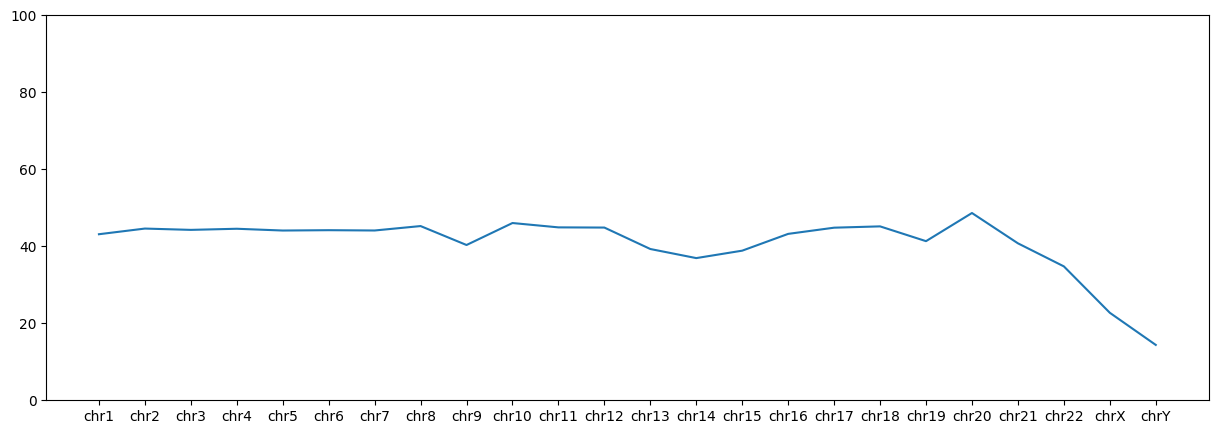

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.lineplot(y=[data[i][1] for i in range(len(data))],x=[data[i][0] for i in range(len(data))])
plt.ylim(0, 100)

In [ ]:
new_df = pd.DataFrame(data, columns=["chrom", "mean_depth"])

In [ ]:
new_df.loc[len(new_df.index)] = ["Coverage", mean_coverage]

In [ ]:
new_df.to_csv(out_file, index=False, sep='\t')